In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from transformers import pipeline


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from google.colab import files
uploaded = files.upload()  # Select the file when prompted
df = pd.read_csv("reviews.csv")  # Use the uploaded filename

Saving reviews.csv to reviews.csv


In [ ]:
df.head(5)

,business_name,author_name,text,photo,rating,rating_category
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu


In [ ]:
df.shape

(1100, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   business_name    1100 non-null   object
 1   author_name      1100 non-null   object
 2   text             1100 non-null   object
 3   photo            1100 non-null   object
 4   rating           1100 non-null   int64 
 5   rating_category  1100 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.7+ KB


In [ ]:
df.describe()

,rating
count,1100.000000
mean,3.912727
std,1.218459
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
df.isnull().sum()

,0
business_name,0
author_name,0
text,0
photo,0
rating,0
rating_category,0


In [ ]:
def categorize_rating(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df['categorize_sentiment_rating'] = df['rating'].apply(categorize_rating)

In [ ]:
df['categorize_sentiment_rating'].value_counts()

,count
categorize_sentiment_rating,
Positive,776
Neutral,172
Negative,152


In [ ]:
def apply_stemming(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text.lower())
    stemmed = [stemmer.stem(word) for word in tokens]
    return " ".join(stemmed)

# Lemmatization function
def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(lemmatized)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)  # Limit features for simplicity
X = vectorizer.fit_transform(df['text']).toarray()

In [ ]:

sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
from transformers import pipeline
# Specify the model and revision explicitly
sentiment_analyzer = pipeline(
    'sentiment-analysis',
    model="distilbert/distilbert-base-uncased-finetuned-sst-2-english",
    revision="714eb0f"
)

# Apply the pipeline
df['predicted_sentiment'] = df['text'].apply(lambda x: sentiment_analyzer(x)[0]['label'])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
df.head(10)

,business_name,author_name,text,photo,rating,rating_category,categorize_sentiment_rating,sentiment_score,predicted_sentiment
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste,Positive,0.3071,NEGATIVE
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu,Positive,0.7565,NEGATIVE
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere,Neutral,0.7184,POSITIVE
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere,Positive,0.6114,POSITIVE
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu,Neutral,0.0000,POSITIVE
5,Haci'nin Yeri - Yigit Lokantasi,Arda Karaca,Generally good.,dataset/indoor_atmosphere/hacinin_yeri_arda_ka...,4,indoor_atmosphere,Positive,0.4404,POSITIVE
6,Haci'nin Yeri - Yigit Lokantasi,İrem Eren,What you see is 125 TL in total. It's a pretty...,dataset/taste/hacinin_yeri_irem_eren.png,5,taste,Positive,0.8534,POSITIVE
7,Haci'nin Yeri - Yigit Lokantasi,Nadia Salim,Delicious food at rock bottom prices. Friendly...,dataset/taste/hacinin_yeri_nadia_salim.png,5,taste,Positive,0.8655,POSITIVE
8,Haci'nin Yeri - Yigit Lokantasi,Mehmet Eser,"Every time I go, I still experience the amazem...",dataset/outdoor_atmosphere/hacinin_yeri_mehmet...,5,outdoor_atmosphere,Positive,0.7096,POSITIVE
9,Haci'nin Yeri - Yigit Lokantasi,Celal Ozer,The most f/p of all businesses I've seen.,dataset/indoor_atmosphere/hacinin_yeri_celal_o...,5,indoor_atmosphere,Positive,0.0000,POSITIVE


In [ ]:
baseline_accuracy = df['predicted_sentiment'].value_counts().max() / len(df)
print(f"Baseline Accuracy: {baseline_accuracy:.2f}")

Baseline Accuracy: 0.73


USING CROSS VALIDATION FOR ACCURACY

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['predicted_sentiment']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = MultinomialNB()

In [ ]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

In [ ]:
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

Cross-Validation Scores: [0.77272727 0.79545455 0.77840909 0.80681818 0.76704545]
Mean CV Accuracy: 0.7840909090909091


In [ ]:
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.8136363636363636


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

In [ ]:
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)


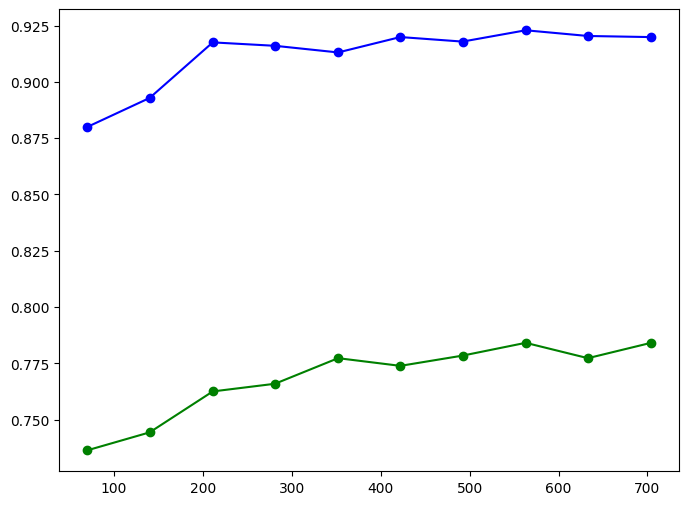

In [ ]:
# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='green', marker='o')

<ipython-input-27-113c6ec3774b>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


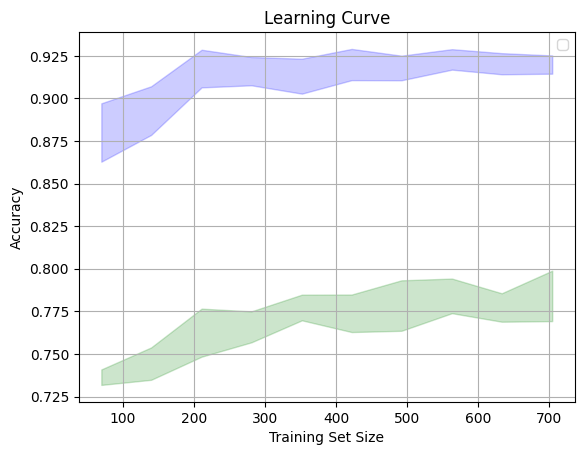

In [ ]:
# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
negative_reviews = df[df['categorize_sentiment_rating'] == 'Negative']
neutral_reviews = df[df['categorize_sentiment_rating'] == 'Neutral']
positive_reviews = df[df['categorize_sentiment_rating'] == 'Positive']

# Example: If you want to analyze or improve 'Negative' sentiment reviews
print("Number of Negative Reviews:", negative_reviews.shape[0])
print("Negative Reviews Sample:")
print(negative_reviews.head())  # Display the first few negative reviews



# For targeted improvements, you can apply further filtering, like those with low ratings or specific keywords:
# For example, negative reviews with ratings less than 3 (if 'rating' is another column you have):
targeted_improvements = df[(df['categorize_sentiment_rating'] == 'Negative') & (df['rating'] <= 3)]

print("Targeted Improvement Reviews:")
print(targeted_improvements.head())

Number of Negative Reviews: 152
Negative Reviews Sample:
   business_name    author_name  \
12  Pizza Fellas   Serkan Colak   
23      Cafe Inn  Hooman Sadati   
32      Cafe Inn     Eren Kesti   
36       Riviera   Goksel Aybek   
39       Riviera    Metin Tumay   

                                                 text  \
12  Flavor : It has nothing but dough taste. Labor...   
23  Without any taste how they are at the first ra...   
32  When I went; I waited for almost 20 minutes fo...   
36  The sushi was too small so it was not possible...   
39       It was very expensive, but taste wasn't bad.   

                                                photo  rating  \
12        dataset/taste/pizza_fellas_serkan_colak.png       2   
23           dataset/taste/cafe_inn_hooman_sadati.png       1   
32  dataset/outdoor_atmosphere/cafe_inn_eren_kesti...       2   
36             dataset/taste/riviera_goksel_aybek.png       2   
39               dataset/menu/riviera_metin_tumay.png       2   

In [ ]:
poor_reviews = df[df['text'].str.contains('poor', case=False)] #case:direct condition flase
print("Poor Reviews Sample:")
print(poor_reviews.head())

Poor Reviews Sample:
       business_name        author_name  \
364             Nesh        Fatma Bolat   
380            Flash    Grigory Laputin   
527   Ahsap Iskender        Faruk Colak   
847       Red Dragon       Teoman Sezer   
1088    Berdan Doner  Ibrahim Saridemir   

                                                   text  \
364   The waffle was very successful; especially the...   
380   Good place to eat. However; the staff work poo...   
527   Expensive; poor presentation; taste was not go...   
847   Chinese salad and spring rolls were okay. I di...   
1088  The meat is DELICIOUS; the price is reasonable...   

                                                  photo  rating  \
364                  dataset/taste/nesh_fatma_bolak.png       4   
380             dataset/taste/flash_grigory_laputin.png       3   
527        dataset/taste/ahsap_iskender_faruk_colak.png       3   
847   dataset/outdoor_atmosphere/red_dragon_teoman_s...       4   
1088   dataset/taste/berdan_do

In [ ]:
# Define states based on your data distribution
def get_state(sentiment_score):
    """Convert sentiment score to discrete state based on your data distribution"""
    if sentiment_score <= -0.5:
        return 'very_negative'
    elif sentiment_score <= -0.2:
        return 'negative'
    elif sentiment_score <= 0.2:
        return 'neutral'
    elif sentiment_score <= 0.5:
        return 'positive'
    else:
        return 'very_positive'

# Define categories and possible actions
Rating_categories = df['rating_category'].unique()
states = ['very_negative', 'negative', 'neutral', 'positive', 'very_positive']
actions = ['improve', 'maintain', 'moderate']




In [ ]:
# Initialize Q-table for each category
q_tables = {category: np.zeros((len(states), len(actions))) for category in Rating_categories}

#Q-tabel is a 2D Numpy array of Zero
def calculate_reward(old_score, new_score, target_score=0.6):
    """
    Calculate reward based on movement towards target score
    Target score is set to 0.6 as a positive sentiment threshold
    """
    old_distance = abs(target_score - old_score)
    new_distance = abs(target_score - new_score)

    if new_distance < old_distance:
        return 1
    elif new_distance == old_distance:
        return 0
    else:
        return -1

def take_action(score, action):
    """Modify the sentiment score based on the chosen action"""
    if action == 'imaaprove':
        return min(1.0, score + np.random.uniform(0.1, 0.3))  #increases the sentiment score by adding a random value between 0.1 and 0.3
    elif action == 'maintain':
        return score + np.random.uniform(-0.1, 0.1)
    else:  # moderate
        return max(-1.0, score - np.random.uniform(0.1, 0.3))  #decreases the sentiment score by subtracting a random value between 0.1 and 0.3

In [ ]:
sentiment_values=df.sentiment_score
print(sentiment_values)

0       0.3071
1       0.7565
2       0.7184
3       0.6114
4       0.0000
         ...  
1095    0.8479
1096    0.0000
1097    0.0000
1098   -0.7845
1099    0.7906
Name: sentiment_score, Length: 1100, dtype: float64


In [ ]:
episodes = 1000
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.2

for category in Rating_categories:
    print(f"\nTraining for rating_category: {category}")
    category_data = df[df['rating_category'] == category]

    for episode in range(episodes):
        # Randomly select a review from the category
        sample = category_data.sample(n=1).iloc[0]
        current_score = sample['sentiment_score']
        current_state = get_state(current_score)

        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = np.random.choice(actions)
        else:
            state_index = states.index(current_state)
            action_index = np.argmax(q_tables[category][state_index])
            action = actions[action_index]

        # Take action and get new state
        new_score = take_action(current_score, action)
        new_state = get_state(new_score)
        reward = calculate_reward(current_score, new_score)

        # Update Q-table
        state_index = states.index(current_state)
        action_index = actions.index(action)
        next_state_index = states.index(new_state)

        q_tables[category][state_index, action_index] += learning_rate * (
            reward + discount_factor * np.max(q_tables[category][next_state_index])
            - q_tables[category][state_index, action_index]
        )

        # Print progress
        if (episode + 1) % 200 == 0:
            print(f"Episode {episode + 1}")
            print(f"Current score: {current_score:.4f} -> New score: {new_score:.4f}")
            print(f"Current state: {current_state} -> New state: {new_state}")
            print(f"Reward: {reward}")
            print("---")

# Print final Q-tables
for category in Rating_categories:
    print(f"\nTrained Q-Table for Rating_category: {category}")
    print("States (rows):", states)
    print("Actions (columns):", actions)
    print(q_tables[category])

# Function to get recommended action for a new review
def get_recommendation(rating_category, sentiment_score):
    state = get_state(sentiment_score)
    state_index = states.index(state)
    action_index = np.argmax(q_tables[rating_category][state_index])
    return actions[action_index]

# Example of using the trained model
print("\nExample Recommendations:")
for index, row in df.sample(3).iterrows():
    recommended_action = get_recommendation(row['rating_category'], row['sentiment_score'])
    print(f"Rating Category: {row['rating_category']}")
    print(f"Current Sentiment Score: {row['sentiment_score']:.4f}")
    print(f"Recommended Action: {recommended_action}")
    print("---")




Training for rating_category: taste
Episode 200
Current score: 0.5719 -> New score: 0.3071
Current state: very_positive -> New state: positive
Reward: -1
---
Episode 400
Current score: -0.6908 -> New score: -0.9292
Current state: very_negative -> New state: very_negative
Reward: -1
---
Episode 600
Current score: 0.7131 -> New score: 0.5419
Current state: very_positive -> New state: very_positive
Reward: 1
---
Episode 800
Current score: 0.5849 -> New score: 0.5605
Current state: very_positive -> New state: very_positive
Reward: -1
---
Episode 1000
Current score: 0.8479 -> New score: 0.8470
Current state: very_positive -> New state: very_positive
Reward: 1
---

Training for rating_category: menu
Episode 200
Current score: 0.4939 -> New score: 0.3943
Current state: positive -> New state: positive
Reward: -1
---
Episode 400
Current score: 0.4404 -> New score: 0.3518
Current state: positive -> New state: positive
Reward: -1
---
Episode 600
Current score: -0.3595 -> New score: -0.5108
Curre

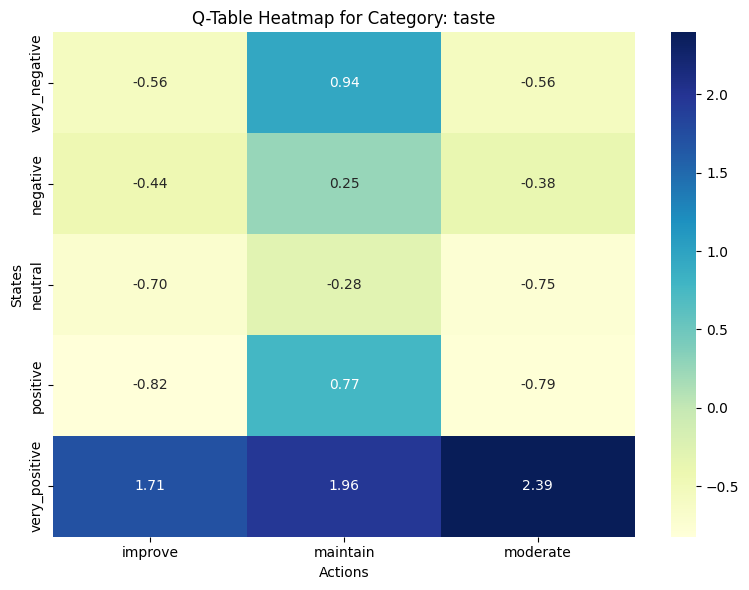

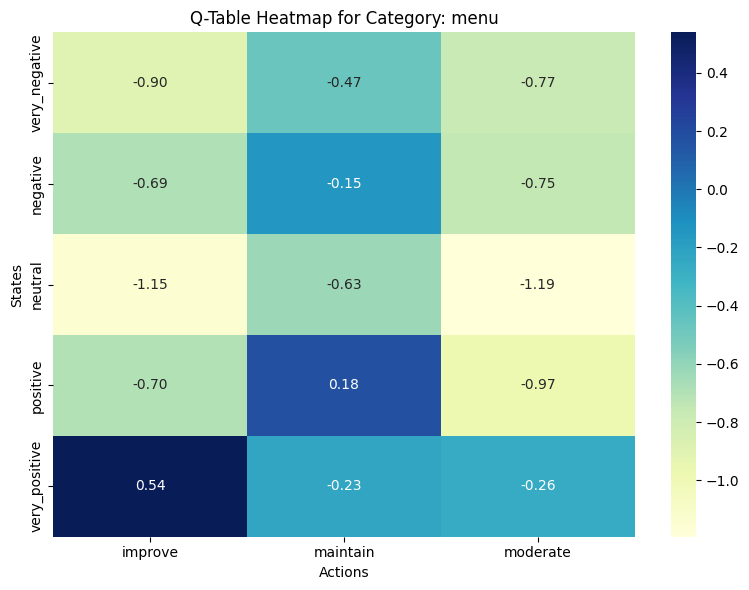

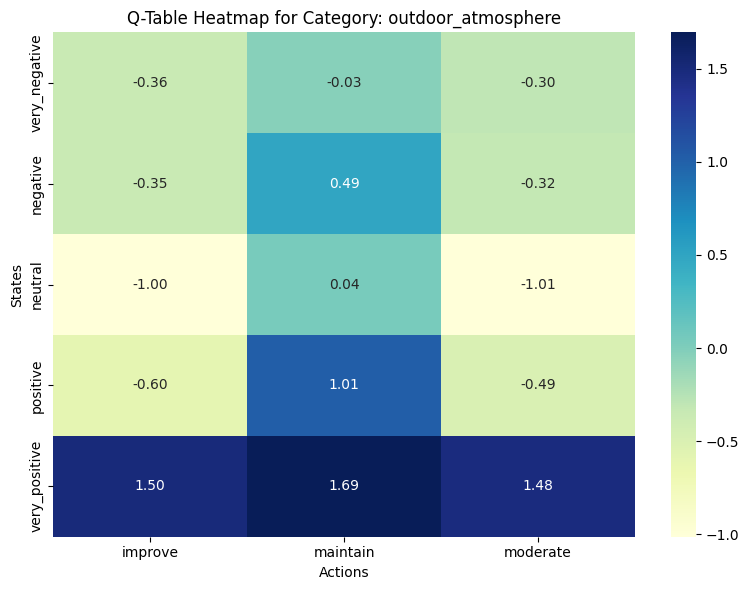

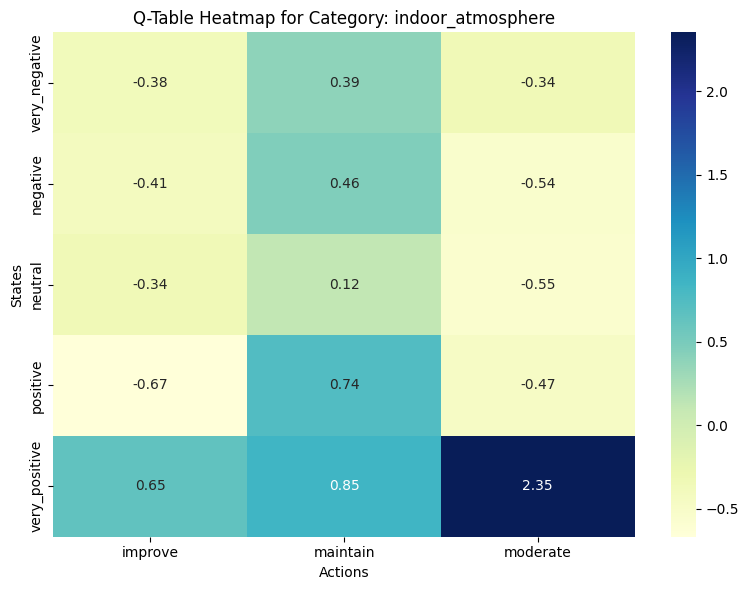

In [ ]:
import seaborn as sns

for category in Rating_categories:
    plt.figure(figsize=(8, 6))
    sns.heatmap(q_tables[category], annot=True, fmt=".2f",
                xticklabels=actions, yticklabels=states, cmap="YlGnBu")
    plt.title(f"Q-Table Heatmap for Category: {category}")
    plt.xlabel("Actions")
    plt.ylabel("States")
    plt.tight_layout()
    plt.show()
